# Week 3 Day 3 morning: Graphics

In [ ]:
%run "boaz_utils.ipynb"

__Today:__ 
2pm-3pm  review of this week and __ask me anything__ <br><br>
_Optional_ __3:30pm in Auditorium I__ crypto talk <br><br> 
At __5pm__ info on Vanderbilt university <br><br>

Come take pictures with me at lunch! <br><br>

__Hike__ tomorrow Entoto

__Tomorrow morning:__ Trip to __Entoto__ with TAs! More details to follow. __Tell your lab leader__ if you're interested in joining!

# Graphics on a computer

This image is made of 1,000,000 little dots- __pixels__ ($1024\times 768$).

Each pixel has a different color.

All colors are obtained by mixing <span style="color:red">red</span>, <span style="color:green">green</span> and <span style="color:blue">blue</span>   

In [ ]:
from PIL import Image
import numpy as np

def empty_screen(w=100,h=100):
    res = [ [color(255,255,255) for i in range(h)] for j in range(w)]
    return res
    
def color(red=0,green=0,blue=0):
    return (red,green,blue) 

def array_to_image(array, scale=2):
    w = len(array)
    h = len(array[0])
    data = np.zeros((h*scale, w*scale, 3), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            for k in range(scale):
                for l in range(scale):
                    data[(h-1)*scale-(j*scale + k),i*scale+l] = array[i][j]
    img = Image.fromarray(data, 'RGB')
    img.save('my.png')
    return dsp.Image(filename='my.png')
    

    
def plot_array(array, scale=2):
    dsp.clear_output(True)
    dsp.display_png(array_to_image(array,scale))
    # sys.stdout.flush()

In [ ]:
def plot_array(array, scale=2):
    dsp.clear_output(True)
    w = len(array)
    h = len(array[0])
    data = np.zeros((h*scale, w*scale, 3), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            for k in range(scale):
                for l in range(scale):
                    data[(h-1)*scale-(j*scale + k),i*scale+l] = array[i][j]
    plt.imshow(data,interpolation="nearest")
    plt.show()

In [ ]:
def plot_array(array, scale=2):
    dsp.clear_output(True)
    w = len(array)
    h = len(array[0])
    data = np.zeros((h*scale, w*scale, 3), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            for k in range(scale):
                for l in range(scale):
                    data[(h-1)*scale-(j*scale + k),i*scale+l] = array[i][j]
    img = Image.fromarray(data, 'RGB')
    display(img) # ,Image.LANCZOS)
    return None

In [ ]:
def RGB(red,green,blue):
    s = empty_screen(100,100)
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i][j] = color(red,green,blue)
    return array_to_image(s)

In [ ]:
from ipywidgets import interact,interactive, fixed, Box
import ipywidgets as widgets

In [ ]:
import IPython.display as dsp

In [ ]:
def demo_RGB():
    interact(RGB, red=widgets.IntSlider(min=0,max=255,step=50,value=255),
        green=widgets.IntSlider(min=0,max=255,step=50,value=0),
         blue=widgets.IntSlider(min=0,max=255,step=50,value=0))

In [127]:
demo_RGB()

interactive(children=(IntSlider(value=255, description='red', max=255, step=50), IntSlider(value=0, descriptio…

```color(red,green,blue)```: just returns list of 3 numbers <br>

* ```empty_screen(height,width)```: returns an ```width``` $\times$ ```height``` array ```s``` (namely a list  of ```width``` lists, each of them is of  length ```height```). For every ```x``` between 0 and ```width``` and ```y``` between 0 and ```height```,  ```s[x][y] = color(255,255,255)```.

* ```plot_array(s)```: plots the array ```s``` on the screen where ```s[0][0]``` corresponds to the bottom left corner and ```s[width][length]``` corresponds to the top right corner.

We will now demonstrate how to use these functions:

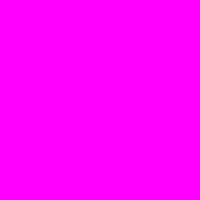

In [130]:
c = [255,0,255]
s = [[c for i in range(100)] for i in range(100)]
plot_array(s)

In [ ]:
color(blue=255)

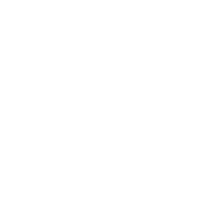

In [131]:
def empty_screen(w=100,h=100):
    white = [255,255,255]
    res = [ [white for i in range(h)] for j in range(w)]
    return res
 
s = empty_screen(100,100)
plot_array(s)

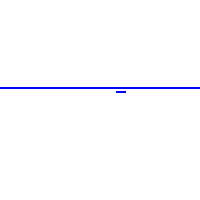

In [137]:
blue = color(red=0,blue=255,green=0)
for i in range(100):
    s[i][55] = blue
plot_array(s)

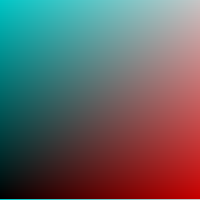

In [139]:
s = empty_screen(100,100)
for i in range(100):
    for j in range(100):
        s[i][j] = [i*2,j*2,j*2]
plot_array(s)

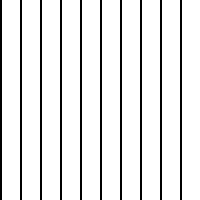

In [142]:
s = empty_screen(100,100)
for i in range(100):
    for j in range(100):
        if i % 10:
            s[i][j] = [255,255,255]
        else:
            s[i][j] = [0,0,0]
plot_array(s)

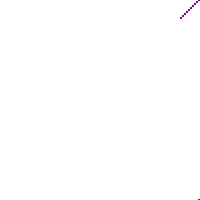

In [146]:
s = empty_screen(100,100)
white = [255,255,255]
purple = [128,0,128]
for i in range(100):
    s[i][i]= purple
    if i>=10:
        s[i-10][i-10]=white 
    plot_array(s)

In [ ]:
import math
def sine(angle):
    return math.sin((angle/360.0)*2*math.pi)
def cosine(angle):
    return math.cos((angle/360.0)*2*math.pi)

In [ ]:
def cannon(angle,speed,time, gravity=9.8):
    x = speed*time*cosine(angle)
    y = speed*time*sine(angle) -(gravity/2.0)*(time**2)
    return round(x,3),round(y,3)

In [151]:
cannon(90,10,1,gravity=9.8)

(0.0, 5.1)

In [ ]:
cannon(45,10,200,gravity=0)

In [ ]:
cannon(30,10,100,gravity=0)

In [ ]:
cannon(70,10,100,gravity=0)

In [ ]:
cannon(45,100,10)

In [ ]:
cannon(45,100,20)

In [ ]:
cannon(30,100,10)

In [ ]:
cannon(60,100,10)

In [164]:
def draw_cannon(angle,speed,g=9.8):
    s = empty_screen(100,50)
    x =0; y =0; t=0.0
    while x<100 and y>=0 and y<50:
        s[x][y] = [0,0,255]
        (x,y) = cannon(angle,speed,t,g)
        x= int(x)
        y = int(y)
        s[x][y] = [255,0,0]
        t += 1.0/speed
        plot_array(s)
    

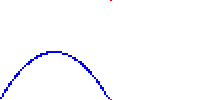

In [166]:
draw_cannon(60,10,1.6)